In [76]:
from keras import models
from keras import layers
from keras.datasets import imdb

Load data

In [77]:
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words= 10000)

showing data
Decode the review

In [78]:
# print(train_data[0])
# print(train_labels[0])
# word_index = imdb.get_word_index()
# r_word_index = dict((v, k ) for k,v in word_index.items())
# decode_review = ''.join([r_word_index[word] + ' ' for word in train_data[0]])
# print(decode_review)

vectorize the sequences

In [79]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

Construct the Network

In [80]:
from keras import optimizers
from keras import losses, metrics
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

Setting validation data

In [81]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Trainnig the model

In [82]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['acc'])
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 1s 34ms/step - loss: 0.5059 - binary_accuracy: 0.7732 - val_loss: 0.3849 - val_binary_accuracy: 0.8532
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 0.3062 - binary_accuracy: 0.8913 - val_loss: 0.2948 - val_binary_accuracy: 0.8888
Epoch 3/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2254 - binary_accuracy: 0.9195 - val_loss: 0.2734 - val_binary_accuracy: 0.8901
Epoch 4/10
30/30 [==============================] - 1s 17ms/step - loss: 0.1804 - binary_accuracy: 0.9354 - val_loss: 0.3180 - val_binary_accuracy: 0.8753
Epoch 5/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1564 - binary_accuracy: 0.9432 - val_loss: 0.3009 - val_binary_accuracy: 0.8826
Epoch 6/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1268 - binary_accuracy: 0.9551 - val_loss: 0.2980 - val_binary_accuracy: 0.8836
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - los

Plot the Training loss

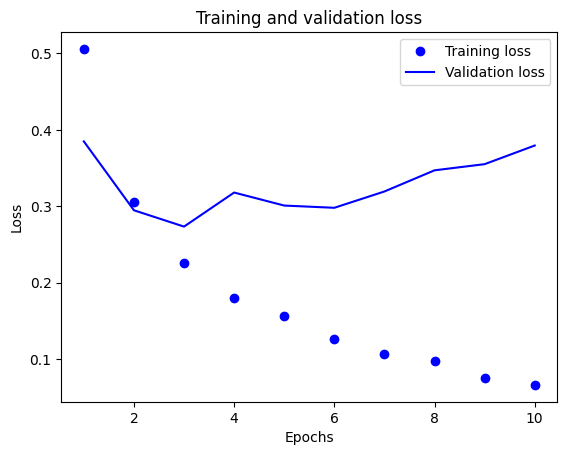

In [83]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the accutacy

In [88]:
print(history_dic)

{'loss': [0.5059276819229126, 0.3062247037887573, 0.2253905087709427, 0.18036270141601562, 0.15639325976371765, 0.12682822346687317, 0.10628943890333176, 0.09736798703670502, 0.07543288916349411, 0.06617984175682068], 'binary_accuracy': [0.7731999754905701, 0.8912666440010071, 0.9194666743278503, 0.9354000091552734, 0.9431999921798706, 0.9550666809082031, 0.9635999798774719, 0.9684666395187378, 0.9765333533287048, 0.9802666902542114], 'val_loss': [0.38492220640182495, 0.294758141040802, 0.27338969707489014, 0.3179612159729004, 0.3009283244609833, 0.298000693321228, 0.3193531334400177, 0.3470458686351776, 0.355106383562088, 0.37950581312179565], 'val_binary_accuracy': [0.8532000184059143, 0.8888000249862671, 0.8901000022888184, 0.8752999901771545, 0.8826000094413757, 0.8835999965667725, 0.8780999779701233, 0.8759999871253967, 0.8769999742507935, 0.8790000081062317]}


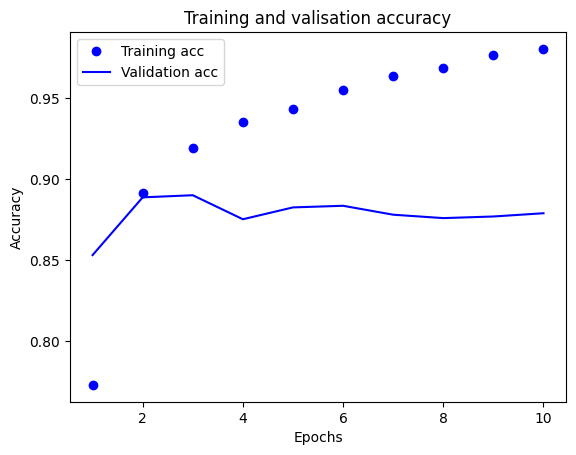

In [91]:
acc = history_dic['binary_accuracy']
val_acc = history_dic['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label= "Validation acc")
plt.title('Training and valisation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate the model

In [92]:
result = model.evaluate(x_test, y_test)
print(result)

782/782 [==============================] - 1s 2ms/step - loss: 0.4066 - binary_accuracy: 0.8673
[0.40657833218574524, 0.8672800064086914]
